In [1]:
from UTILITY_quickstart import *

# runImpact(
#     gridCount = 4,
#     numMacroParticles = 1e3,
#     GFILESuffix = "distgen_twobunch.yaml"
# )

-15


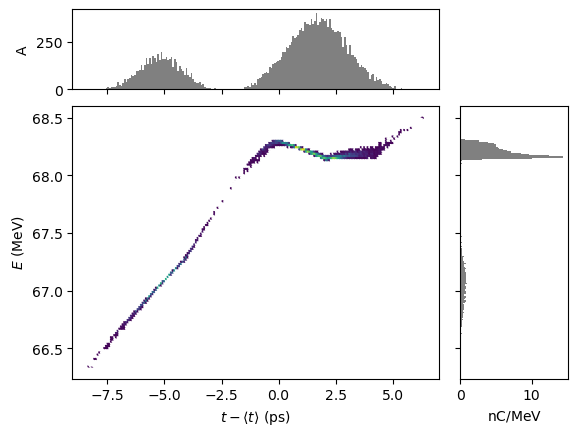

67913634.1430523


-10


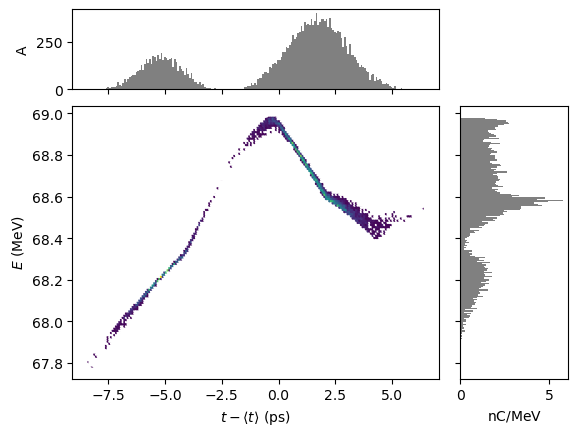

68571008.7121529


-5


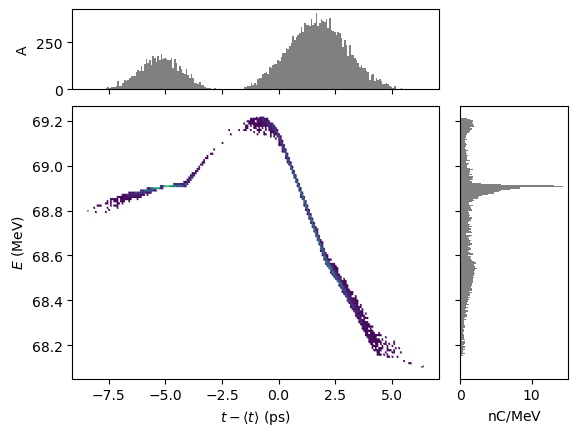

68757320.00616854


0


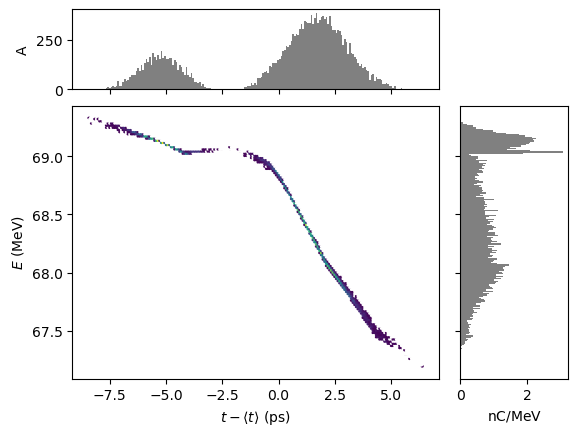

68466550.77984102


5


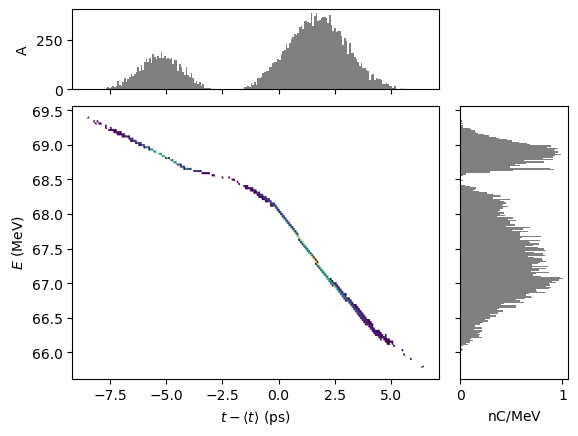

67696278.75843477


10


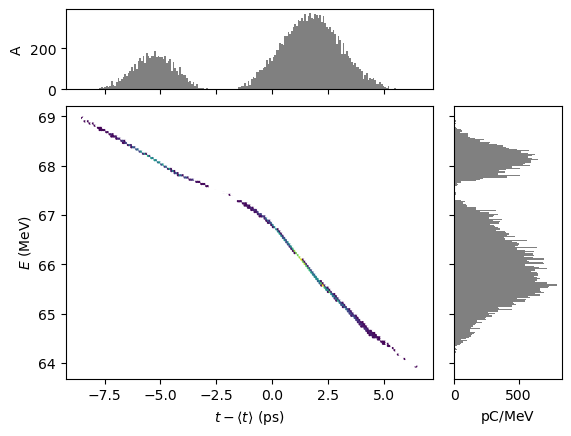

66447535.808365405


15


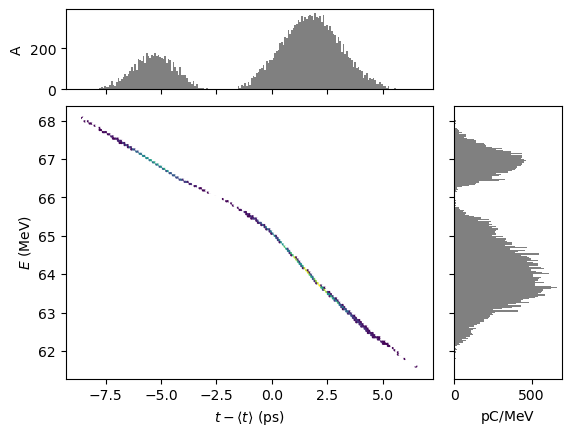

64724612.42403458




In [4]:
#Phase scan
import contextlib
import io



for L0APhaseOffset in np.arange(-15,20,5):
    print(L0APhaseOffset)
    
    with contextlib.redirect_stdout(io.StringIO()): #Silence the function
        runImpact(
            gridCount = 8,
            numMacroParticles = 1e4,
            GFILESuffix = "distgen_twobunch.yaml",
            L0APhaseOffset = L0APhaseOffset
        )


    P = ParticleGroup("/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/beams/ImpactBeam.h5")
    display(plotMod(P, 'delta_t', 'energy',  bins=200))
    print(np.mean(P.energy))
    print("\n")

-0.45


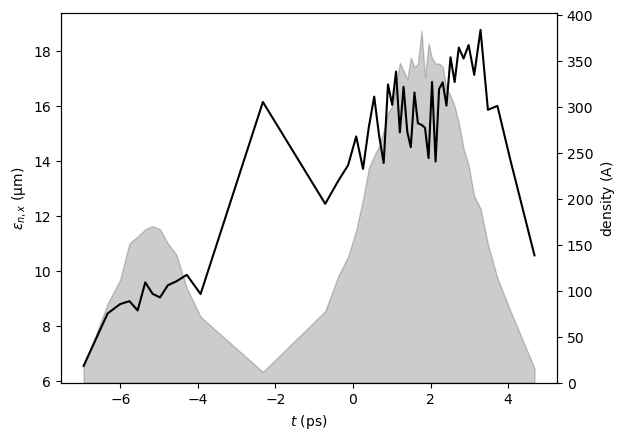

Ensemble: 2.85284459946723e-05, 2.643623733168695e-05
-0.4


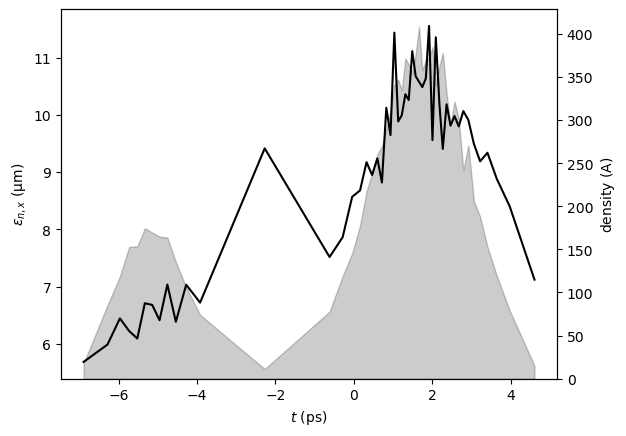

Ensemble: 1.5035432884006746e-05, 1.4833508236198659e-05
-0.35000000000000003


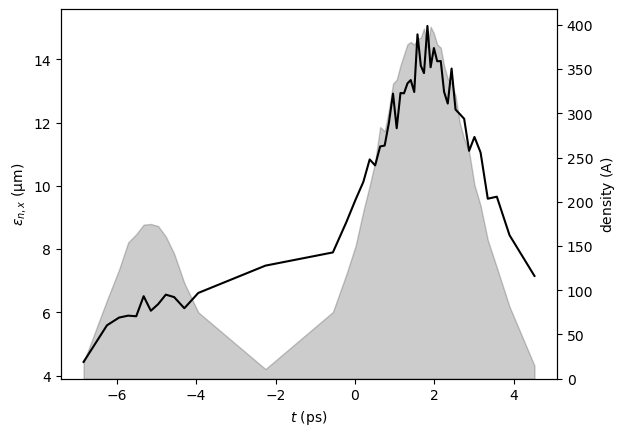

Ensemble: 1.646487834885949e-05, 1.7036269629190754e-05
-0.30000000000000004


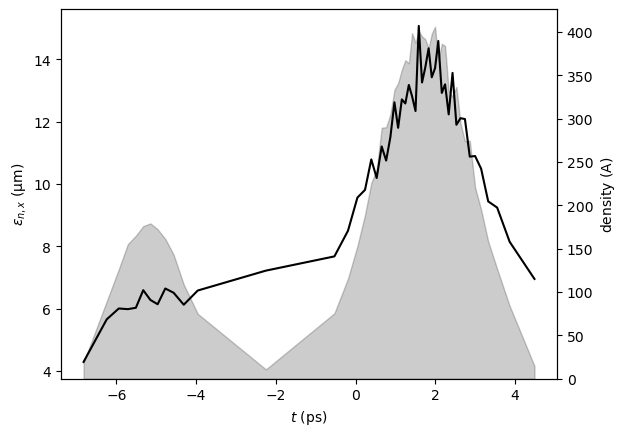

Ensemble: 1.5996959217801987e-05, 1.8984601477625007e-05
-0.25000000000000006


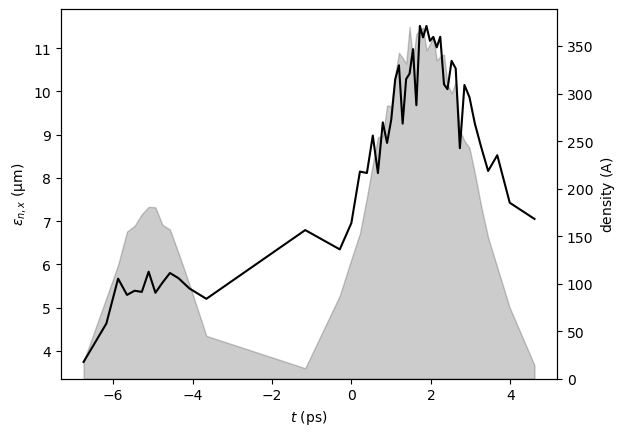

Ensemble: 1.480985380411679e-05, 2.140263030804492e-05
-0.20000000000000007


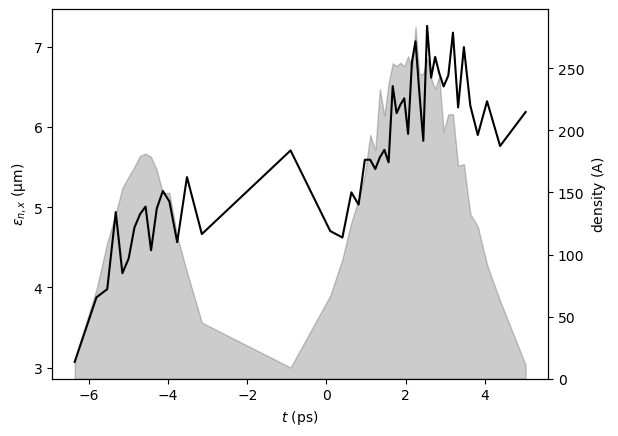

Ensemble: 1.2142829173654213e-05, 1.7964824259984376e-05
-0.15000000000000008


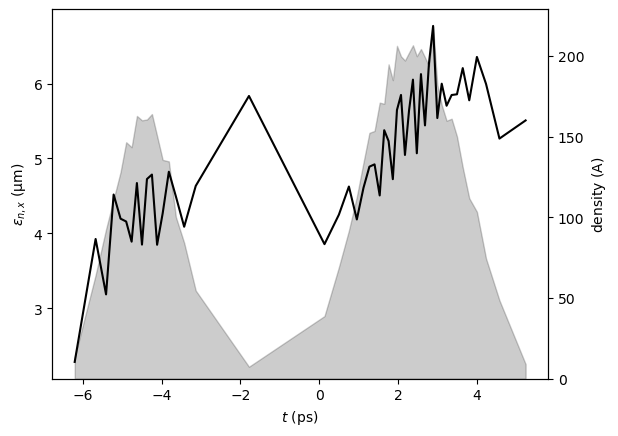

Ensemble: 1.1154303771798982e-05, 1.2150065430993826e-05
-0.10000000000000009


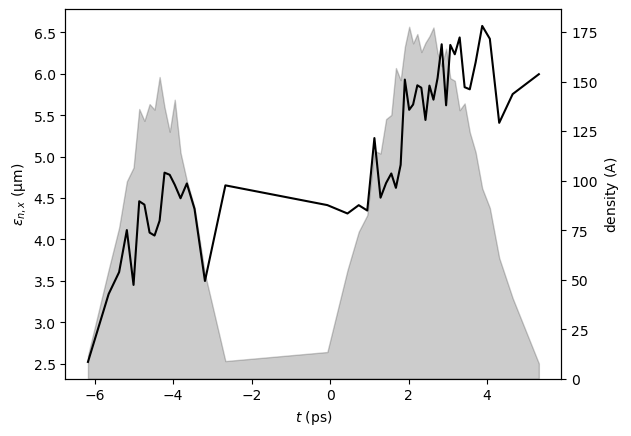

Ensemble: 9.644304193088463e-06, 9.426208873199164e-06
-0.0500000000000001


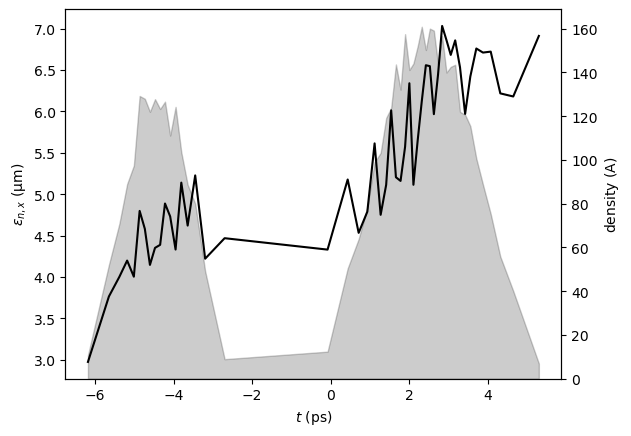

Ensemble: 9.210777404728867e-06, 8.76048362294706e-06
-1.1102230246251565e-16


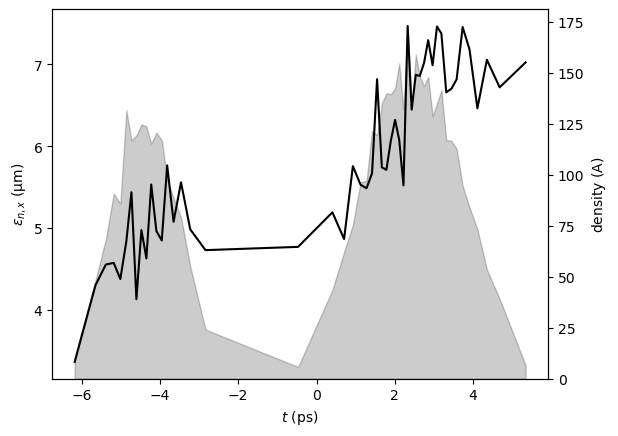

Ensemble: 9.180130047633522e-06, 8.708335041887282e-06
0.04999999999999988


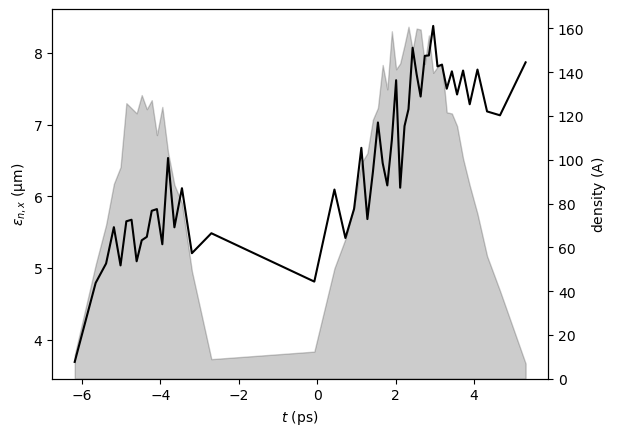

Ensemble: 9.944078373000455e-06, 9.013748705544905e-06
0.09999999999999987


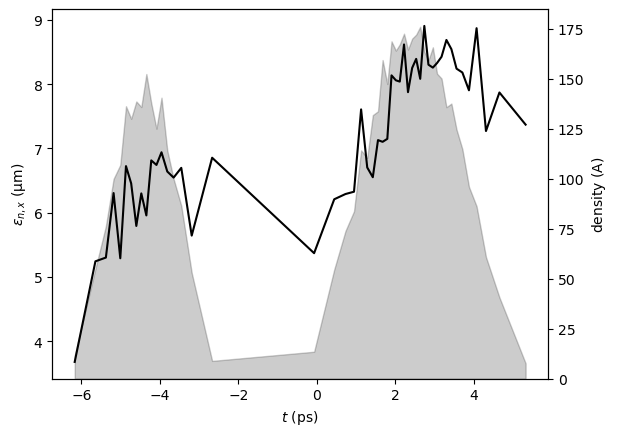

Ensemble: 1.1333514761867936e-05, 9.450862652910867e-06
0.14999999999999986


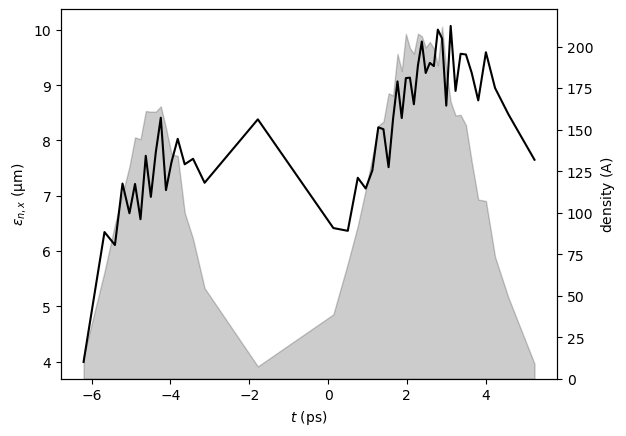

Ensemble: 1.4658782488676513e-05, 1.0448414358553758e-05
0.19999999999999984


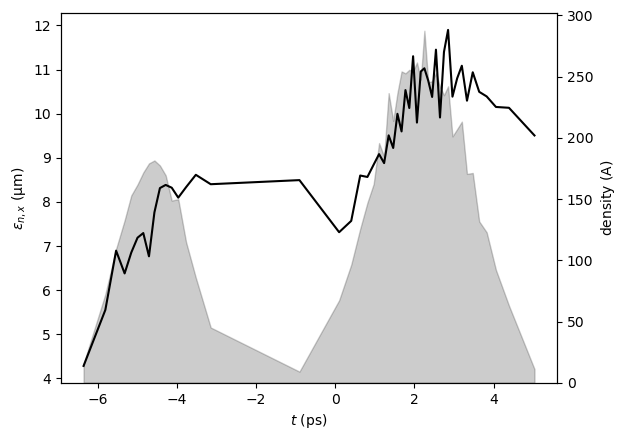

Ensemble: 1.9106987736520653e-05, 1.2269577561403316e-05
0.24999999999999983


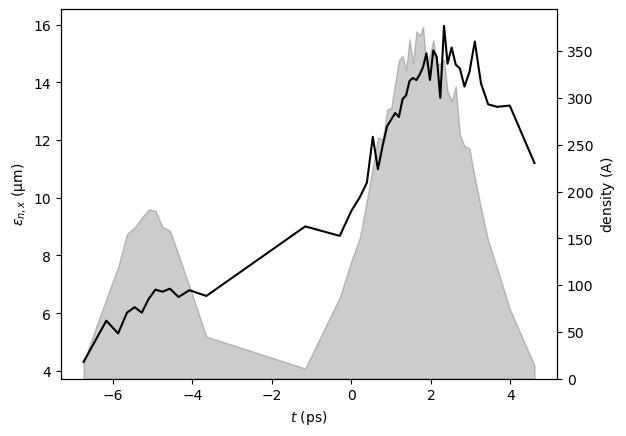

Ensemble: 2.14082157025652e-05, 1.5255004998865529e-05
0.2999999999999998


KeyboardInterrupt: 

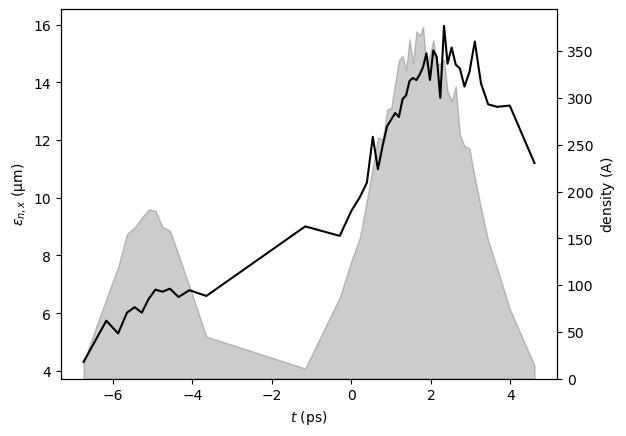

In [2]:
#Solenoid scan
import contextlib
import io


for solenoidTValue in np.arange(-0.45,0.45,0.05):
    print(solenoidTValue)
    
    with contextlib.redirect_stdout(io.StringIO()): #Silence the function
        runImpact(
            gridCount = 8,
            numMacroParticles = 1e4,
            GFILESuffix = "distgen_twobunch.yaml",
            L0APhaseOffset = -10,
            solenoidTValue = solenoidTValue
        )


    P = ParticleGroup("/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/beams/ImpactBeam.h5")

    #PDriver, PWitness = getDriverAndWitness(P)

    display(slicePlotMod(P, 'norm_emit_x', n_slice=50))
    print(f"""Ensemble: {P["norm_emit_x"]}, {P["norm_emit_y"]}""")

    with open("solScan.txt", "a") as file:
        file.write(f"""{solenoidTValue}, {P["norm_emit_x"]}, {P["norm_emit_y"]} \n""")
        file.flush()  # Ensure the content is written immediately
    #print(f"""Driver: {PDriver["norm_emit_x"]}, {PDriver["norm_emit_y"]}""")
    #print(f"""Witness: {PWitness["norm_emit_x"]}, {PWitness["norm_emit_y"]}""")

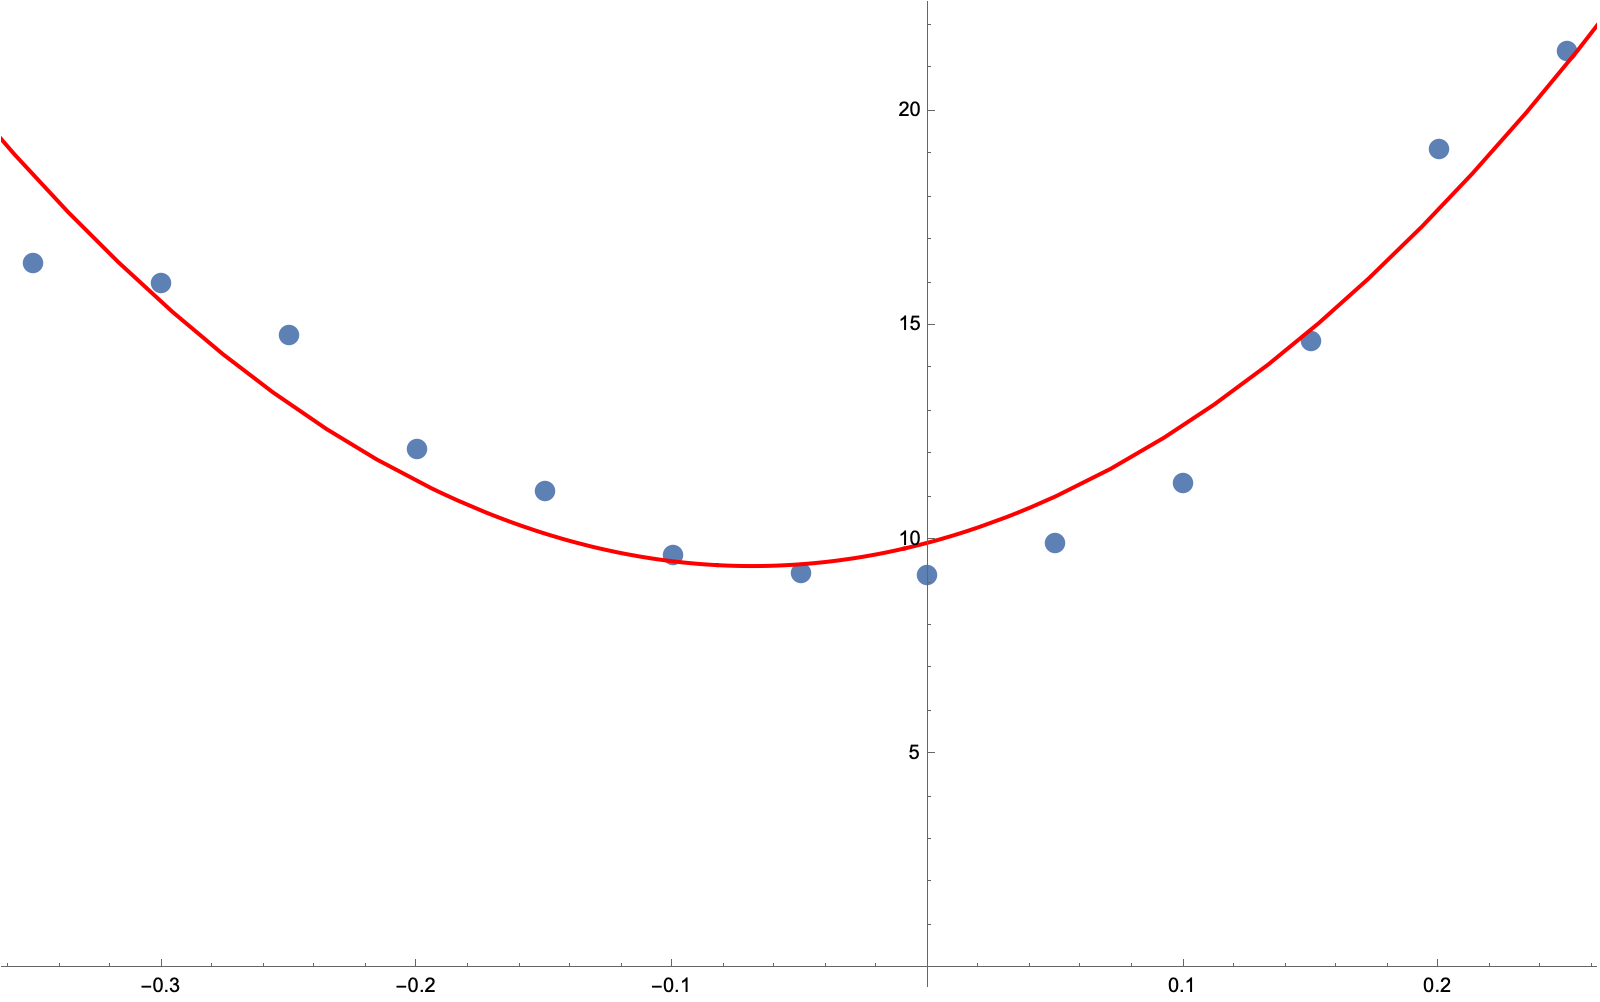

In [2]:
runImpact(
    gridCount = 32,
    numMacroParticles = 1e5,
    GFILESuffix = "distgen_twobunch.yaml",
    L0APhaseOffset = -10,
    solenoidTValue = -0.10
)

Running Impact
Assuming default file path: /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
	 Impact: Autophasing
	 Impact: Distgen
	 Impact: Tracking
Running Impact-T in /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmp8rkgemrv
/opt/homebrew/anaconda3/envs/bmadclone/bin/ImpactTexe
writing 100000 particles to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmp8rkgemrv/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 100000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 1.848462511456037e-11 according to initial particles
Cathode start: Replaced Tini with -4.68716129620563e-12 according to initial particles
Setting total charge to 1.6000000000000005e-09 C
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: V2.3.1
 ! Copyright of The Regents of the University of California


In [6]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/ImpactBeam.h5'
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Loading default setLattice() values
Number of macro particles defined by input file


In [7]:
trackBeam(tao)

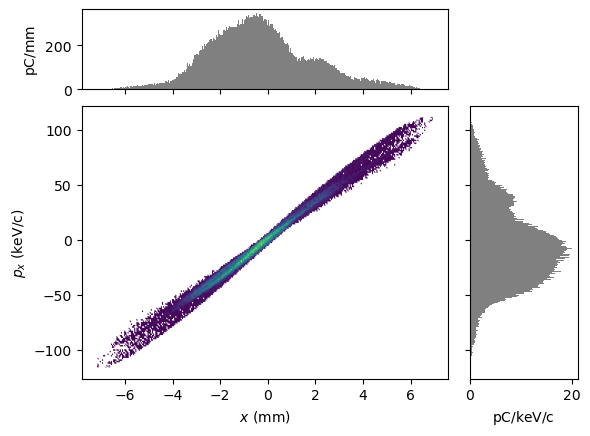

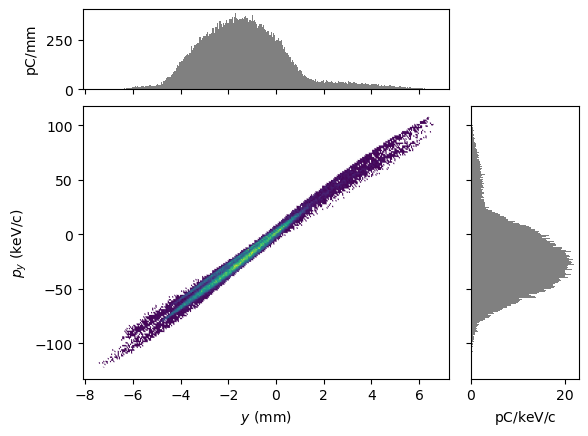

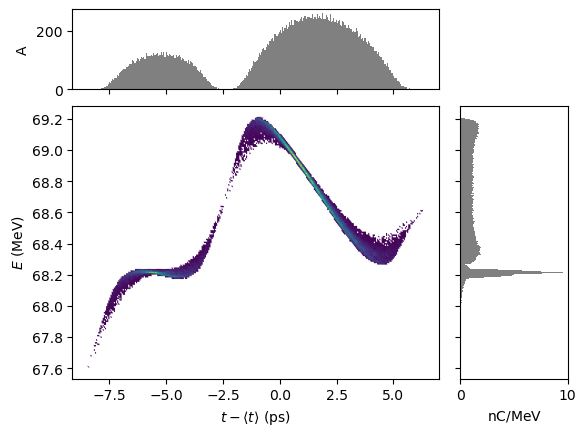

68607910.72374614

In [8]:
P =  ParticleGroup(data=tao.bunch_data("L0AFEND"))
display(plotMod(P, 'x', 'px',  bins=300))
display(plotMod(P, 'y', 'py',  bins=300))
display(plotMod(P, 'delta_t', 'energy',  bins=300))
np.mean(P.energy)

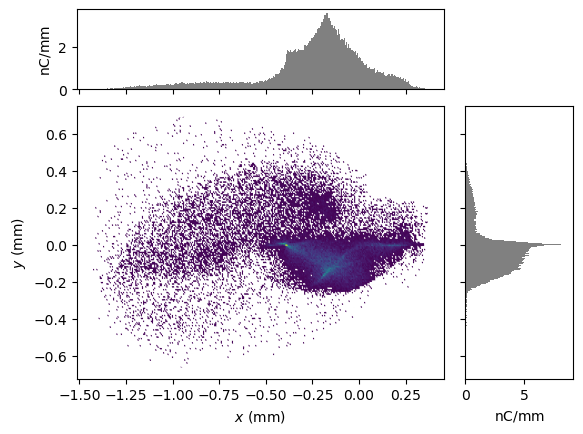

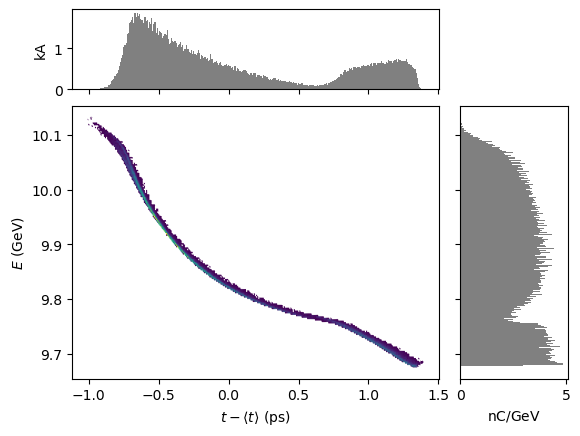

In [9]:
P =  ParticleGroup(data=tao.bunch_data("PENT"))
P = P[P.status == 1]
display(plotMod(P, 'x', 'y',  bins=300));
display(plotMod(P, 'delta_t', 'energy',  bins=300));

# Vs GPT

In [6]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample.h5',
    #inputBeamFilePathSuffix = '/beams/L0AFEND_facet2-lattice.h5',
)

trackBeam(tao)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Loading default setLattice() values
Number of macro particles defined by input file


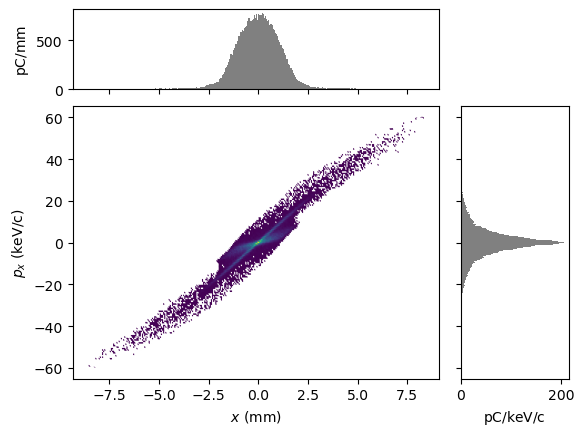

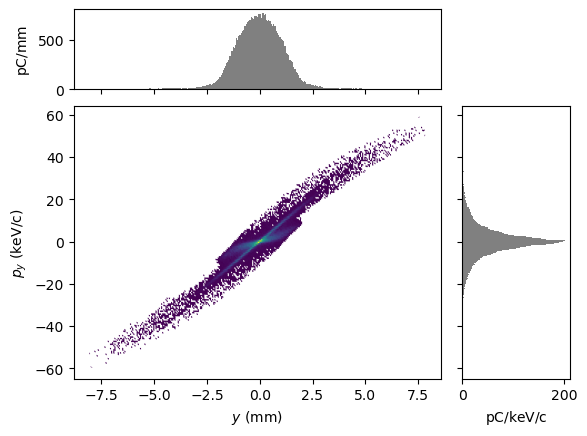

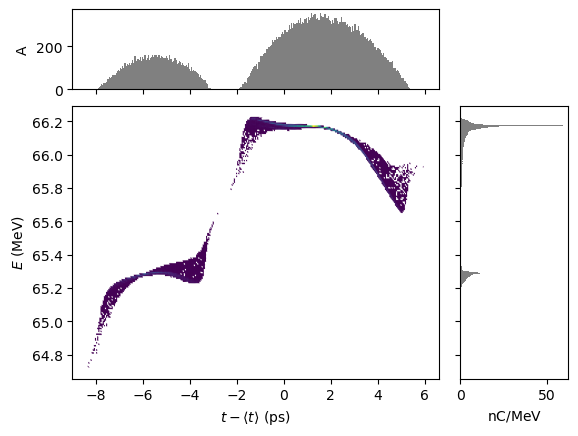

65908610.99263252

In [7]:
P =  ParticleGroup(data=tao.bunch_data("L0AFEND"))
display(plotMod(P, 'x', 'px',  bins=300))
display(plotMod(P, 'y', 'py',  bins=300))
display(plotMod(P, 'delta_t', 'energy',  bins=300))
np.mean(P.energy)

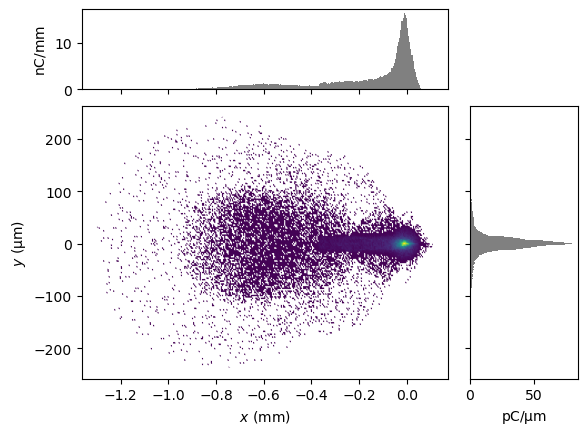

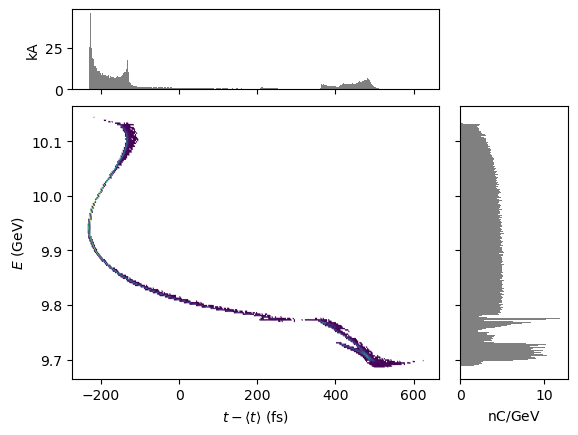

In [8]:
P =  ParticleGroup(data=tao.bunch_data("PENT"))
P = P[P.status == 1]
display(plotMod(P, 'x', 'y',  bins=300));
display(plotMod(P, 'delta_t', 'energy',  bins=300));